In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))
import cv2

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
datasetdir = r'/content/drive/MyDrive/Google-Image-Scraper-master/photos'
os.chdir(datasetdir)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 3

def DataLoad(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.1,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer','Collar shirt','Designer saree','Hoodies',
                 'Jacket','jean pant','Oversized TShirt','shorts', 'Striped Shirt','Tshirt','Wide leg pants'],
        batch_size = batch_size,
        subset = 'training', 
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
         classes = ['Blazer','Collar shirt','Designer saree','Hoodies',
                 'Jacket','jean pant','Oversized TShirt','shorts', 'Striped Shirt','Tshirt','Wide leg pants'],
        batch_size = batch_size,
        subset = 'validation'
    )
    return train_dataset, val_dataset

In [30]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)


In [31]:
train_dataset, val_dataset = DataLoad((224,224), preprocessing=vgg16.preprocess_input)

Found 86 images belonging to 11 classes.
Found 6 images belonging to 11 classes.


In [32]:
X_train, y_train = next(train_dataset)

In [33]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [34]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(11, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [35]:
for layer in conv_model.layers:
    layer.trainable = False

In [36]:
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir=r'/content/drive/MyDrive/Google-Image-Scraper-master/photos'
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
# X_test, y_test = next(test_generator)

Found 203 images belonging to 11 classes.


In [38]:
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=0,
    epochs=3,
)

<ipython-input-38-21980531c01a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model.fit_generator(


Epoch 1/3
29/29 [==============================] - 62s 2s/step - loss: 3.1777 - acc: 0.6047 - val_loss: 1.4415 - val_acc: 0.6667
Epoch 2/3
29/29 [==============================] - 64s 2s/step - loss: 1.0906 - acc: 0.7791 - val_loss: 1.2248 - val_acc: 0.8333
Epoch 3/3
29/29 [==============================] - 60s 2s/step - loss: 0.2251 - acc: 0.9419 - val_loss: 0.9478 - val_acc: 0.8333


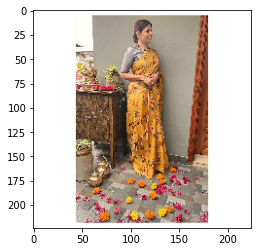

In [42]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


img_path = r'/content/drive/MyDrive/Google-Image-Scraper-master/Test Images/4.jpg'
img = image.load_img(img_path, target_size=(224,224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)

In [43]:
img = image.load_img(img_path1, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [44]:
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string
    
preds = full_model.predict(x)
pred_labels = np.argmax(preds, axis=1)
print('Predicted_Class is:', pred_labels)     #Get the rounded value of the predicted class
true_index = 5
# print('true_label is:', true_labels)     #Get the rounded value of the predicted class
print("Predicted label: " + get_class_string_from_index(pred_labels))

1/1 [==============================] - 1s 757ms/step
Predicted_Class is: [2]
Predicted label: Designer saree
